In [1]:
import datetime
import json
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
nyrestaurants = pd.read_csv("nyrestaurants.csv", encoding="utf-8")
print(len(nyrestaurants))
print(nyrestaurants.dtypes)
nyrestaurants.head()

398783
CAMIS                      int64
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
PHONE                     object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
CUISINE DESCRIPTION       object
ZIPCODE                    int64
INSPECTION DATE           object
dtype: object


C:\Users\dhava\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CAMIS,DBA,BORO,BUILDING,STREET,PHONE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,CUISINE DESCRIPTION,ZIPCODE,INSPECTION DATE
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,7188924968,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10.0,A,02/18/2016,08/28/2017,Cycle Inspection / Initial Inspection,Bakery,10462,2014/04/23
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,7188924968,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,7.0,A,05/18/2017,08/28/2017,Cycle Inspection / Initial Inspection,Bakery,10462,2014/08/26
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,7188924968,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,6.0,A,02/09/2015,08/28/2017,Cycle Inspection / Initial Inspection,Bakery,10462,2016/06/16
3,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,7188924968,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,7.0,A,05/18/2017,08/28/2017,Cycle Inspection / Initial Inspection,Bakery,10462,2017/01/25
4,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,7188924968,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,10.0,A,02/18/2016,08/28/2017,Cycle Inspection / Initial Inspection,Bakery,10462,NaN


In [3]:
foodtype = ["Bakery","Hamburgers","Delicatessen","Ice Cream"," Gelato"," Yogurt"," Ices","Hotdogs","Sandwiches/Salads/Mixed Buffet","Donuts","Bagels/Pretzels","Continental","Pizza","Soul Food","Steak","Pizza/Italian","Cafe/Coffee/Tea","Seafood","Tex-Mex","Bottled beverages"," including water"," sodas"," juices"," etc.","Pancakes/Waffles","Other","Chicken","Barbecue","","Vegetarian","Juice"," Smoothies"," Fruit Salads","Sandwiches","Soups & Sandwiches","Tapas","Salads","Creole","Cajun","Creole/Cajun","Hotdogs/Pretzels","Southwestern","Fruits/Vegetables","Nuts/Confectionary","Soups","Californian","Not Listed/Not Applicable"]
ethnicity = ["Irish","American","Jewish/Kosher","Chinese","Caribbean","Italian","Polish","Latin (Cuban"," Dominican"," Puerto Rican"," South & Central American)","German","French","Mexican","Spanish","Mediterranean","Japanese","Greek","Thai","Indian","Korean","Russian","Ethiopian","Eastern European","Middle Eastern","Egyptian","English","Chinese/Cuban","Asian","Portuguese","Indonesian","Turkish","Moroccan","Hawaiian","Filipino","Brazilian","Vietnamese/Cambodian/Malaysia","Chilean","Afghan","Pakistani","Peruvian","African","Armenian","Bangladeshi","Czech","Iranian","Scandinavian","Polynesian","Australian","Chinese/Japanese"]

cuisinetype = []

for i in range(len(nyrestaurants)):
    if nyrestaurants.iloc[i,15] in ethnicity:
        cuisinetype.append("ethnic")
    else:
        cuisinetype.append("food")
temp = pd.DataFrame({"Cuisine Type": cuisinetype})
nyrestaurants = nyrestaurants.join(temp)
nyrestaurants.head()

,CAMIS,DBA,BORO,BUILDING,STREET,PHONE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,CUISINE DESCRIPTION,ZIPCODE,INSPECTION DATE,Cuisine Type
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,7188924968,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10.0,A,02/18/2016,08/28/2017,Cycle Inspection / Initial Inspection,Bakery,10462,2014/04/23,food
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,7188924968,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,7.0,A,05/18/2017,08/28/2017,Cycle Inspection / Initial Inspection,Bakery,10462,2014/08/26,food
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,7188924968,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,6.0,A,02/09/2015,08/28/2017,Cycle Inspection / Initial Inspection,Bakery,10462,2016/06/16,food
3,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,7188924968,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,7.0,A,05/18/2017,08/28/2017,Cycle Inspection / Initial Inspection,Bakery,10462,2017/01/25,food
4,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,7188924968,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,10.0,A,02/18/2016,08/28/2017,Cycle Inspection / Initial Inspection,Bakery,10462,NaN,food


In [4]:
violationcodes = nyrestaurants['VIOLATION CODE'].unique()
nviolationcodes = len(violationcodes)
print(nviolationcodes)
violationcodes

98


array(['04L', '06D', '06C', '10F', '08A', '04A', '15I', '10B', '04J',
       '08C', '06A', '04N', '15L', '04H', '06B', '02G', '10E', '10A', nan,
       '02I', '10H', '09A', '20A', '22C', '16B', '06E', '02B', '06F',
       '10I', '04M', '10J', '02H', '04D', '04K', '20F', '09C', '09B',
       '04C', '10D', '05D', '22A', '05F', '16A', '02C', '08B', '02A',
       '05B', '20E', '04E', '02D', '05H', '20D', '04O', '22B', '18F',
       '15S', '04B', '10C', '16C', '16E', '16D', '03C', '05C', '03B',
       '22F', '04G', '15J', '04F', '05A', '03A', '22E', '06G', '05E',
       '15K', '07A', '03G', '18C', '06I', '18B', '18D', '22G', '10G',
       '03D', '15T', '04I', '15F', '15E', '20B', '06H', '16F', '15A',
       '05I', '02F', '02E', '03E', '03F', '02J', '15H'], dtype=object)

In [5]:
cuisines = nyrestaurants['CUISINE DESCRIPTION'].unique()
ncuisines = len(cuisines)
print(ncuisines)
cuisines

84


array(['Bakery', 'Hamburgers', 'Irish', 'American', 'Delicatessen',
       'Ice Cream, Gelato, Yogurt, Ices', 'Hotdogs', 'Jewish/Kosher',
       'Chinese', 'Sandwiches/Salads/Mixed Buffet', 'Caribbean', 'Donuts',
       'Bagels/Pretzels', 'Continental', 'Pizza', 'Soul Food', 'Italian',
       'Steak', 'Polish',
       'Latin (Cuban, Dominican, Puerto Rican, South & Central American)',
       'German', 'French', 'Pizza/Italian', 'Mexican', 'Spanish',
       'Cafe/Coffee/Tea', 'Seafood', 'Tex-Mex',
       'Bottled beverages, including water, sodas, juices, etc.',
       'Pancakes/Waffles', 'Other', 'Mediterranean', 'Japanese', 'Greek',
       'Thai', 'Indian', 'Korean', 'Chicken', 'Russian', 'Ethiopian',
       'Eastern European', 'Barbecue', 'Middle Eastern', 'Egyptian',
       'English', 'Chinese/Cuban', 'Asian', 'Portuguese', 'Indonesian',
       'Turkish', 'Moroccan', 'Hawaiian', 'Vegetarian', 'Filipino',
       'Juice, Smoothies, Fruit Salads', 'Sandwiches', 'Brazilian',
       'Vie

In [6]:
byfood = nyrestaurants.loc[nyrestaurants["Cuisine Type"] == "food", :]
byfood.head()

,CAMIS,DBA,BORO,BUILDING,STREET,PHONE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,CUISINE DESCRIPTION,ZIPCODE,INSPECTION DATE,Cuisine Type
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,7188924968,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10.0,A,02/18/2016,08/28/2017,Cycle Inspection / Initial Inspection,Bakery,10462,2014/04/23,food
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,7188924968,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,7.0,A,05/18/2017,08/28/2017,Cycle Inspection / Initial Inspection,Bakery,10462,2014/08/26,food
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,7188924968,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,6.0,A,02/09/2015,08/28/2017,Cycle Inspection / Initial Inspection,Bakery,10462,2016/06/16,food
3,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,7188924968,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,7.0,A,05/18/2017,08/28/2017,Cycle Inspection / Initial Inspection,Bakery,10462,2017/01/25,food
4,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,7188924968,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,10.0,A,02/18/2016,08/28/2017,Cycle Inspection / Initial Inspection,Bakery,10462,NaN,food


In [7]:
byethnicity = nyrestaurants.loc[nyrestaurants["Cuisine Type"] == "ethnic", :]
byethnicity.head()

,CAMIS,DBA,BORO,BUILDING,STREET,PHONE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,CUISINE DESCRIPTION,ZIPCODE,INSPECTION DATE,Cuisine Type
30,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,351,WEST 57 STREET,2122452912,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,10.0,A,05/31/2016,08/28/2017,Cycle Inspection / Initial Inspection,Irish,10019,2014/05/09,ethnic
31,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,351,WEST 57 STREET,2122452912,Violations were cited in the following area(s).,02I,Food prepared from ingredients at ambient temp...,Critical,26.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection,Irish,10019,2015/04/07,ethnic
32,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,351,WEST 57 STREET,2122452912,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,26.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection,Irish,10019,2015/04/08,ethnic
33,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,351,WEST 57 STREET,2122452912,Violations were cited in the following area(s).,10H,Proper sanitization not provided for utensil w...,Not Critical,12.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection,Irish,10019,2015/04/29,ethnic
34,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,351,WEST 57 STREET,2122452912,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,26.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection,Irish,10019,2015/05/26,ethnic


In [8]:
# By food type
groupByCuisineRest = byfood.groupby(['CUISINE DESCRIPTION','DBA'])
perRestaurant = pd.DataFrame({'# of violations':groupByCuisineRest['CAMIS'].count()})
print(perRestaurant['# of violations'].sum())
perRestaurant.head()

131218


# of violations
CUISINE DESCRIPTION DBA                                     
Bagels/Pretzels     A&R HOT BAGELS                         3
                    ABSOLUTE BAGELS                       15
                    ACE HOT BAGEL & DELI                  26
                    ACTS III BAGELS                       16
                    AMERICAN NEW YORK BAGEL               17

In [9]:
# By ethnicity
groupByCuisineRest = byethnicity.groupby(['CUISINE DESCRIPTION','DBA'])
perRestaurant = pd.DataFrame({'# of violations':groupByCuisineRest['CAMIS'].count()})
print(perRestaurant['# of violations'].sum())
perRestaurant.head()

267565


# of violations
CUISINE DESCRIPTION DBA                                            
Afghan              AFGHAN KEBAB HOUSE                            4
                    AFGHAN KEBAB HOUSE #1                        11
                    AFGHAN KEBOB HOUSE                           15
                    ARIA KABAB                                   14
                    ARIA KABAB /TARIQ AFGHAN KABAB               23

In [10]:
# All restaurants
groupByCuisineRest = nyrestaurants.groupby(['CUISINE DESCRIPTION','DBA'])
perRestaurant = pd.DataFrame({'# of violations':groupByCuisineRest['CAMIS'].count()})
print(perRestaurant['# of violations'].sum())
perRestaurant.head()

398783


# of violations
CUISINE DESCRIPTION DBA                                            
Afghan              AFGHAN KEBAB HOUSE                            4
                    AFGHAN KEBAB HOUSE #1                        11
                    AFGHAN KEBOB HOUSE                           15
                    ARIA KABAB                                   14
                    ARIA KABAB /TARIQ AFGHAN KABAB               23

In [11]:
# By food
groupByCuisine = byfood.groupby(['CUISINE DESCRIPTION'])
perCuisine = pd.DataFrame({'# of violations':groupByCuisine['CAMIS'].count()})
nRestPerCuisine = pd.DataFrame({'# of restaurants':groupByCuisine['CAMIS'].nunique()})
perCuisine['# of restaurants'] = nRestPerCuisine['# of restaurants']
perCuisine["nViol_Rest"] = perCuisine['# of violations'] /perCuisine['# of restaurants']
perCuisine.head()

,# of violations,# of restaurants,nViol_Rest
CUISINE DESCRIPTION,,,
Bagels/Pretzels,2795,173,16.156069
Bakery,11946,726,16.454545
Barbecue,858,52,16.500000
"Bottled beverages, including water, sodas, juices, etc.",1147,101,11.356436
Cafe/Coffee/Tea,15562,1547,10.059470


In [18]:
# By ethnicity
groupByCuisine = byethnicity.groupby(['CUISINE DESCRIPTION'])
perCuisine = pd.DataFrame({'# of violations':groupByCuisine['CAMIS'].count()})
nRestPerCuisine = pd.DataFrame({'# of restaurants':groupByCuisine['CAMIS'].nunique()})
perCuisine['# of restaurants'] = nRestPerCuisine['# of restaurants']
perCuisine["nViol_Rest"] = perCuisine['# of violations'] /perCuisine['# of restaurants']
perCuisine.head()

,# of violations,# of restaurants,nViol_Rest
CUISINE DESCRIPTION,,,
Afghan,221,16,13.812500
African,1426,71,20.084507
American,90954,6093,14.927622
Armenian,484,36,13.444444
Asian,6254,366,17.087432


In [22]:
# All restaurants
groupByCuisine = nyrestaurants.groupby(['CUISINE DESCRIPTION'])
perCuisine = pd.DataFrame({'# of violations':groupByCuisine['CAMIS'].count()})
nRestPerCuisine = pd.DataFrame({'# of restaurants':groupByCuisine['CAMIS'].nunique()})
perCuisine['# of restaurants'] = nRestPerCuisine['# of restaurants']
perCuisine["nViol_Rest"] = perCuisine['# of violations'] /perCuisine['# of restaurants']
perCuisine.head()

,# of violations,# of restaurants,nViol_Rest
CUISINE DESCRIPTION,,,
Afghan,221,16,13.812500
African,1426,71,20.084507
American,90954,6093,14.927622
Armenian,484,36,13.444444
Asian,6254,366,17.087432


In [26]:
groupByViolationCode = nyrestaurants.groupby(['VIOLATION CODE'])
dftmp = pd.DataFrame({'VIOLATION DESCRIPTION':groupByViolationCode['VIOLATION DESCRIPTION'].unique()})
desclist =[]
for desc in dftmp['VIOLATION DESCRIPTION']:
    desclist.append(desc[0])
desclist

perViolation = pd.DataFrame({'VIOLATION DESCRIPTION':desclist,'# of violations':groupByViolationCode['CAMIS'].count()})
perViolation = perViolation.sort_values('# of violations', ascending=False)

totalviolations = perViolation['# of violations'].sum()
perViolation['%'] = 100 * perViolation['# of violations'] / totalviolations

print(f"Total violations: {totalviolations}")
perViolation.head(15)


Total violations: 393414


,VIOLATION DESCRIPTION,# of violations,%
VIOLATION CODE,,,
10F,Non-food contact surface improperly constructe...,55785,14.179719
08A,Facility not vermin proof. Harborage or condit...,39992,10.165373
02G,Cold food item held above 41Âº F (smoked fish ...,27852,7.079565
04L,Evidence of mice or live mice present in facil...,27777,7.060501
06D,"Food contact surface not properly washed, rins...",26115,6.638045
06C,Food not protected from potential source of co...,25955,6.597376
10B,Plumbing not properly installed or maintained;...,22141,5.627914
02B,Hot food item not held at or above 140Âº F.,19650,4.994738
04N,Filth flies or food/refuse/sewage-associated (...,19482,4.952035


In [27]:
perViolation.to_csv("test.csv",index=False,header=True)
perViolation

,VIOLATION DESCRIPTION,# of violations,%
VIOLATION CODE,,,
10F,Non-food contact surface improperly constructe...,55785,14.179719
08A,Facility not vermin proof. Harborage or condit...,39992,10.165373
02G,Cold food item held above 41Âº F (smoked fish ...,27852,7.079565
04L,Evidence of mice or live mice present in facil...,27777,7.060501
06D,"Food contact surface not properly washed, rins...",26115,6.638045
06C,Food not protected from potential source of co...,25955,6.597376
10B,Plumbing not properly installed or maintained;...,22141,5.627914
02B,Hot food item not held at or above 140Âº F.,19650,4.994738
04N,Filth flies or food/refuse/sewage-associated (...,19482,4.952035


In [29]:
perViolation = pd.read_csv("perviolation.csv")
perViolation

,VIOLATION DESCRIPTION,# of violations,%
0,Non-food contact surface issue,55785.0,14.179719
1,Facility not vermin proof,39992.0,10.165373
2,Cold food item handling issue,27852.0,7.079565
3,Evidence of mice,27777.0,7.060501
4,Food contact surface issue,26115.0,6.638045
5,Food contamination risk,25955.0,6.597376
6,Pluming/Ventilation/Draining/Sewage,22141.0,5.627914
7,Hot food item handing issue,19650.0,4.994738
8,Fly issue,19482.0,4.952035
9,Others,NaN,32.704733


In [30]:
groupByBoro = nyrestaurants.groupby(['BORO'])
perBoro = pd.DataFrame({'# of Restaurants':groupByBoro['CAMIS'].nunique()
                        ,'# of violations':groupByBoro['CAMIS'].count()})
perBoro = perBoro.sort_values('# of Restaurants', ascending=False)
perBoro['# of violations per restaurant'] = perBoro['# of violations']/perBoro['# of Restaurants']
perBoro.head(15)

,# of Restaurants,# of violations,# of violations per restaurant
BORO,,,
MANHATTAN,10168,159099,15.647030
BROOKLYN,6223,99297,15.956452
QUEENS,5742,92175,16.052769
BRONX,2323,34824,14.990960
STATEN ISLAND,914,13388,14.647702


In [47]:
# # Labels for the sections of our pie chart
# labels = perViolation["VIOLATION DESCRIPTION"]
# # The values of each section of the pie chart
# sizes = perViolation["%"]
# # The colors of each section of the pie chart
# # colors = ["red", "orange", "lightcoral", "lightskyblue"]
# # # Tells matplotlib to seperate the "Python" section from the others
# explode = (0.2, 0, 0, 0 ,0 ,0 ,0 ,0 ,0 ,0)
# plt.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=-40)
# # ax1.axis('equal')

# fig = plt.gcf()
# fig.set_size_inches(9,8)
# plt.show

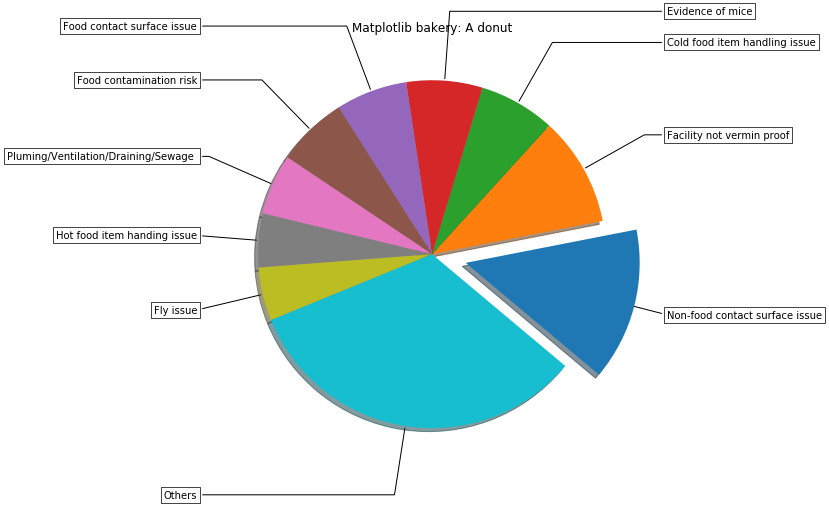

In [48]:
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(aspect="equal"))
recipe = perViolation["VIOLATION DESCRIPTION"]
data = perViolation["%"]
# wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)
explode = (0.2, 0, 0, 0 ,0 ,0,0,0,0,0)
wedges, texts  = plt.pie(data, explode=explode, shadow=True, startangle=-40)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
         bbox=bbox_props, zorder=0, va="center")
for i, p in enumerate(wedges):
   ang = (p.theta2 - p.theta1)/2. + p.theta1
   y = np.sin(np.deg2rad(ang))
   x = np.cos(np.deg2rad(ang))
   horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
   connectionstyle = "angle,angleA=0,angleB={}".format(ang)
   kw["arrowprops"].update({"connectionstyle": connectionstyle})
   ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
               horizontalalignment=horizontalalignment, **kw)
ax.set_title("Matplotlib bakery: A donut")
plt.show()